In [9]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pandas as pd
import networkx as nx
import tensorflow as tf
import numpy as np
from utils import predict

In [10]:
species_features_dummy = pd.read_csv("./data/species_features.csv.gz", index_col=0)
molecule_features_dummy = pd.read_csv("./data/molecule_features.csv.gz", index_col=0).astype("int8")
df_agg = pd.read_csv("./data/lotus_agg_test.csv.gz", index_col=0)

In [11]:
rdkit = pd.read_csv("./data/mol_dummy_rdkit.csv.gz", index_col=0).astype('int8')
molecule_features_dummy = molecule_features_dummy.merge(rdkit,
                                                        left_index=True,
                                                        right_index=True)

In [12]:
g_train = nx.read_graphml("./graph/train_graph.gml")
g = nx.read_graphml("./graph/test_graph.gml")
g  = nx.create_empty_copy(g)
g_merged = nx.compose(g_train, g)

In [13]:
df_agg_train = pd.read_csv("./data/lotus_agg_train.csv.gz", index_col=0)

In [14]:
species_feat = species_features_dummy[species_features_dummy.index.isin(df_agg.organism_name)]
molecule_feat = molecule_features_dummy[molecule_features_dummy.index.isin(df_agg.structure_smiles_2D)]

In [15]:
species_unique_to_test_set = df_agg[~df_agg.organism_name.isin(df_agg_train.organism_name)]
molecules_unique_to_test_set = df_agg[~df_agg.structure_smiles_2D.isin(df_agg_train.structure_smiles_2D)]

In [16]:
model_m_to_s = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_m_to_s", compile=True)
model_s_to_m = tf.keras.models.load_model("./model/gbif_batch_128_layer_1024_s_to_m", compile=True)

In [17]:
data = pd.DataFrame(df_agg[['structure_smiles_2D', 'organism_name']].to_numpy(),
                    columns=['molecule', 'species'])

In [18]:
#out = predict(g_train, model_m_to_s, model_s_to_m, data, molecule_features_dummy, species_features_dummy)

In [19]:
import matplotlib.pyplot as plt
plt.hist(out.prob)

NameError: name 'out' is not defined

In [ ]:
sum(out.prob>0.5)/len(out)

In [ ]:
out[out.model!='both_known']

In [ ]:
data_2 = pd.DataFrame(
    molecules_unique_to_test_set[['organism_name', 'structure_smiles_2D']].values,
    columns=['species', 'molecule'])

In [ ]:
data_2

In [ ]:
out_2 = predict(g_train, model_m_to_s, model_s_to_m,
                data_2,
                molecule_features_dummy,
                species_features_dummy
               )

In [ ]:
plt.hist(out_2.prob)

In [20]:
g_test = nx.read_graphml("./graph/test_graph.gml")
g_lotus = nx.compose(g_train, g_test)

In [21]:
sku = pd.concat([df_agg, df_agg_train])

In [124]:
sp = 'Fuligo septica'
data_3 = pd.DataFrame(
    {'molecule': list(set(molecule_features_dummy.index)-set(sku[sku.organism_name==sp].structure_smiles_2D)),
     'species': sp})

In [125]:
data_3

,molecule,species
0,CCCCCCCCC=CCCCCCCCCCCCCCCCCCCC,Fuligo septica
1,CC1=CCC(C(C)C)=CC2C(C)CCC12,Fuligo septica
2,CC(=O)Oc1cccc2c1C(=O)c1c(c(O)c3cc(C(C)OC(C)=O)...,Fuligo septica
3,c1ccc(CCc2ccc(Cc3ccccc3)o2)cc1,Fuligo septica
4,CC1C=C2OC3CC4OC(=O)C=CC=CC56OCCC(=CC(=O)OCC2(C...,Fuligo septica
...,...,...
147734,COc1ccc2c(=O)cc(-c3ccc(O)cc3)oc2c1,Fuligo septica
147735,COc1c(Cl)cc(Cl)cc1C(=O)c1[nH]c(Cl)c(Cl)c1Cl,Fuligo septica
147736,CC(=O)NC(C)(C)C(=O)NC(CC(N)=O)C(=O)NC(CC(C)C)C...,Fuligo septica
147737,COC(=O)CC1CC2C(C=CC23Oc2cccc4cccc(c24)O3)O1,Fuligo septica


In [126]:
out_3 = predict(g_lotus, model_m_to_s, model_s_to_m,
                data_3,
                molecule_features_dummy,
                species_features_dummy
               )

Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 1051
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running 'forward' predictions
145/145 [==============================] - 9s 63ms/step
Predict both : running backward prediction...
145/145 [==============================] - 9s 64ms/step


(array([5.3229e+04, 9.1130e+03, 5.4850e+03, 4.0590e+03, 3.2740e+03,
        2.7630e+03, 2.3480e+03, 2.1780e+03, 1.9770e+03, 1.8420e+03,
        1.7560e+03, 1.7160e+03, 1.5100e+03, 1.4510e+03, 1.3960e+03,
        1.3120e+03, 1.3030e+03, 1.1880e+03, 1.1470e+03, 1.0610e+03,
        1.0270e+03, 1.0210e+03, 9.7200e+02, 9.4500e+02, 9.1200e+02,
        8.8800e+02, 8.7400e+02, 7.9100e+02, 7.8300e+02, 7.4000e+02,
        6.7100e+02, 7.2300e+02, 7.3900e+02, 6.1000e+02, 6.2100e+02,
        6.3700e+02, 6.6600e+02, 6.5500e+02, 5.9300e+02, 5.8500e+02,
        5.1100e+02, 5.3300e+02, 4.9100e+02, 4.9600e+02, 4.9500e+02,
        4.8600e+02, 4.9700e+02, 4.8500e+02, 4.4600e+02, 4.1500e+02,
        4.1600e+02, 4.2400e+02, 4.5000e+02, 3.7500e+02, 4.2000e+02,
        3.8300e+02, 4.1600e+02, 3.8900e+02, 3.4100e+02, 3.8200e+02,
        3.7800e+02, 3.6100e+02, 3.8300e+02, 3.3500e+02, 3.4500e+02,
        3.3500e+02, 3.1600e+02, 3.3000e+02, 3.0000e+02, 3.2900e+02,
        3.4900e+02, 3.2800e+02, 3.2900e+02, 3.01

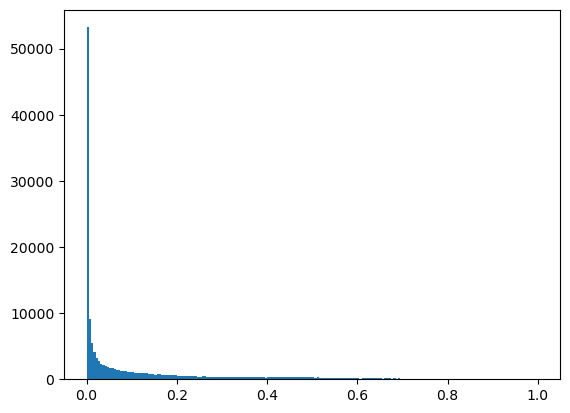

In [127]:
plt.hist(out_3.prob, bins=200)

In [131]:
fuligo = out_3[out_3.prob>0.9]


In [103]:
fuligo.to_csv('outputs/fuligo_anticipated_095.csv.gz', compression='gzip')

# Test 4: let's see if cholesterol is present "everywhere"


In [115]:
mol = 'COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O)OC3'
data_4 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))})

In [116]:
data_4

,molecule,species
0,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Uncaria cordata
1,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Lomatogonium carinthiacum
2,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Luvunga angustifolia
3,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Acremonium
4,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Campylospermum sulcatum
...,...,...
36419,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Senecio bellidifolius
36420,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Lepidium subulatum
36421,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Stachys ocymastrum
36422,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Vismia lindeniana


In [117]:
out_4 = predict(g_lotus, model_m_to_s, model_s_to_m,
                data_4,
                molecule_features_dummy,
                species_features_dummy
               )

Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetworkX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 1051
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running 'forward' predictions
36/36 [==============================] - 2s 63ms/step
Predict both : running backward prediction...
36/36 [==============================] - 4s 110ms/step


(array([1.2308e+04, 2.4830e+03, 1.6080e+03, 1.1800e+03, 9.3400e+02,
        7.4500e+02, 6.2500e+02, 5.5200e+02, 5.0200e+02, 4.6200e+02,
        4.0300e+02, 3.7600e+02, 3.3900e+02, 3.1700e+02, 2.9800e+02,
        2.9000e+02, 2.8000e+02, 2.4700e+02, 2.3900e+02, 2.0500e+02,
        2.0900e+02, 2.2700e+02, 2.0800e+02, 2.0900e+02, 1.9100e+02,
        1.8100e+02, 1.8500e+02, 1.9200e+02, 1.5100e+02, 1.7800e+02,
        1.3900e+02, 1.5700e+02, 1.2500e+02, 1.3100e+02, 1.2200e+02,
        1.4500e+02, 1.4100e+02, 1.3800e+02, 1.2700e+02, 1.2000e+02,
        1.2600e+02, 1.3600e+02, 1.1500e+02, 1.1500e+02, 1.1400e+02,
        1.1600e+02, 9.9000e+01, 1.0500e+02, 1.1700e+02, 1.1100e+02,
        9.7000e+01, 9.3000e+01, 9.1000e+01, 1.1600e+02, 1.0700e+02,
        9.9000e+01, 7.9000e+01, 8.0000e+01, 9.5000e+01, 7.9000e+01,
        7.7000e+01, 1.0100e+02, 8.0000e+01, 6.7000e+01, 8.6000e+01,
        7.5000e+01, 6.9000e+01, 8.5000e+01, 8.1000e+01, 6.5000e+01,
        7.1000e+01, 7.0000e+01, 8.8000e+01, 8.20

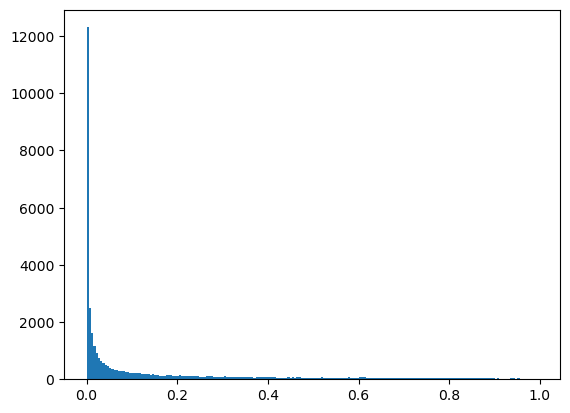

In [118]:
plt.hist(out_4.prob, bins=200)

In [119]:
len(out_4[out_4.prob>0.5])/len(out_4)

0.10866461673621788

In [123]:
out_4[out_4.prob>0.9].sort_values(by='species', ascending=False)


,molecule,species,model,prob
29484,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Zeravschania pauciradiata,both_known,0.939915
3261,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Zanthoxylum wutaiense,both_known,0.938553
13785,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Zanthoxylum tsihanimposa,both_known,0.943991
3477,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Zanthoxylum thomense,both_known,0.940317
1234,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Zanthoxylum syncarpum,both_known,0.903032
...,...,...,...,...
8716,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Adiscanthus fusciflorus,both_known,0.945012
348,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Acronychia pubescens,both_known,0.954962
26946,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Acronychia pedunculata,both_known,0.945565
11871,COc1cc2c(O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O...,Acronychia octandra,both_known,0.941090


# Test 5: test with a more rare molecule 

In [40]:
mol = 'CCCCCc1cc(O)c2c(c1)OC(C)(C)C1CCC(C)=CC21'
data_5 = pd.DataFrame(
    {'molecule': mol,
     'species': list(set(species_features_dummy.index)-set(sku[sku.structure_smiles_2D==mol].organism_name))}
)

In [42]:
out_5 = predict(g_lotus, model_m_to_s, model_s_to_m,
                data_5,
                molecule_features_dummy,
                species_features_dummy
               )

Checking which model should be used for each row...
Adding missing nodes to the graph...
Converting NetwrokX to Stellargraph...
StellarDiGraph: Directed multigraph
 Nodes: 184194, Edges: 869484

 Node types:
  molecule: [147747]
    Features: float32 vector, length 1051
    Edge types: molecule-present_in->species
  species: [36447]
    Features: float32 vector, length 69
    Edge types: species-has->molecule

 Edge types:
    species-has->molecule: [434742]
        Weights: all 1 (default)
        Features: none
    molecule-present_in->species: [434742]
        Weights: all 1 (default)
        Features: none
Creating 'forward', 'backward' flow for KNOWN molecule AND species...
Predict both : running 'forward' predictions
36/36 [==============================] - 6s 159ms/step
Predict both : running backward prediction...
36/36 [==============================] - 6s 165ms/step


(array([1.6963e+04, 2.7290e+03, 1.6320e+03, 1.1290e+03, 8.8100e+02,
        7.2800e+02, 5.9200e+02, 4.8400e+02, 4.5000e+02, 4.1100e+02,
        3.6300e+02, 3.6000e+02, 3.2500e+02, 2.8700e+02, 2.7200e+02,
        2.3800e+02, 2.2400e+02, 2.4200e+02, 1.9600e+02, 1.9400e+02,
        1.8300e+02, 1.7800e+02, 1.8500e+02, 2.0500e+02, 1.8600e+02,
        1.7900e+02, 1.4300e+02, 1.6300e+02, 1.4100e+02, 1.2600e+02,
        1.3100e+02, 1.5000e+02, 1.2800e+02, 1.2200e+02, 1.1600e+02,
        1.1400e+02, 1.1800e+02, 1.3100e+02, 1.0900e+02, 1.1100e+02,
        8.2000e+01, 9.9000e+01, 9.5000e+01, 9.2000e+01, 9.0000e+01,
        9.1000e+01, 7.8000e+01, 9.3000e+01, 8.2000e+01, 8.0000e+01,
        7.6000e+01, 7.4000e+01, 7.0000e+01, 7.1000e+01, 9.0000e+01,
        6.9000e+01, 6.1000e+01, 6.5000e+01, 6.7000e+01, 6.4000e+01,
        6.9000e+01, 5.6000e+01, 6.4000e+01, 6.5000e+01, 5.9000e+01,
        4.7000e+01, 3.5000e+01, 5.7000e+01, 4.9000e+01, 5.7000e+01,
        4.6000e+01, 5.3000e+01, 5.8000e+01, 3.30

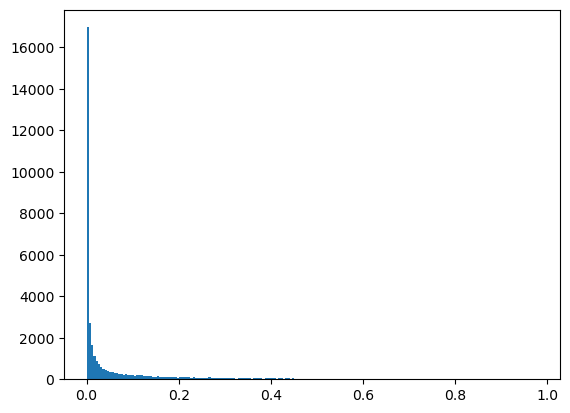

In [45]:
plt.hist(out_5.prob, bins=200)

In [49]:
out_5[out_5.prob>0.98]

,molecule,species,model,prob
